In [ ]:
import pandas as pd
import yfinance as yf
import random

#  table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
#  df = table[0]
#  stockdata = df['Symbol'].to_list()
# full_stock_data = yf.download(stockdata, '2010-01-01', '2021-03-03')
# print(full_stock_data['Volume'])

In [ ]:
data = yf.download("^GSPC")
data_array = data.Close.array.to_numpy()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.Close.array.to_numpy())

In [ ]:
ticker = "^GSPC"
num_years_investment = 10
sum_money = 10000
period_days = 30
inflation = 0.04

In [221]:
class Money:
    def __init__(
        self,
        ticker: str,
        num_years_investment: int,
        period_days: int,
        inflation: float,
        num_trading_days: int = 252,
        num_days_year: float = 365.2,
    ) -> None:
        self.ticker = ticker
        self.num_years_investment = num_years_investment
        self.period_days = period_days
        self.inflation = inflation
        self.data = yf.download(self.ticker, interval="1d")
        self.data_array = self.data.Close.array.to_numpy()
        self.num_trading_days = num_trading_days
        self.num_days_year = num_days_year

    def get_random_starting_date(self) -> float:
        return random.randint(
            0,
            len(self.data_array)
            - self.num_years_investment * self.num_trading_days
            - 1,
        )

    def get_roi_lump(self, start_date: int) -> float:
        # This is lump-sum investing
        end = self.data_array[
            start_date + (self.num_years_investment * self.num_trading_days)
        ]
        start = self.data_array[start_date]

        roi_lump = (end - start) / start

        return roi_lump

    def get_roi_dca(
        self,
    ) -> float:
        self.num_installments = (
            self.num_days_year * self.num_years_investment // self.period_days
        )

    def get_roi(
        self,
    ) -> float:

        start_date = self.get_random_starting_date()
        roi_lump = self.get_roi_lump(start_date)

        return roi_lump

SyntaxError: invalid syntax (79115944.py, line 42)

In [209]:
money = Money(ticker="^GSPC", num_years_investment=10, period_days=30, inflation=0.04)

[*********************100%***********************]  1 of 1 completed


In [220]:
money.get_roi_dca()
print(money.num_installments)

121.73333333333333


In [210]:
money.get_roi()

0.11750788704542421

<AxesSubplot:xlabel='Date'>

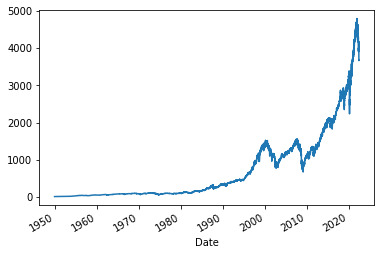

In [142]:
money.data.Close.plot()